# Project #2

## 1- Introduction

In [1]:
import sqlite3
import pandas as pd
import zipfile
import os
import seaborn as sns
import matplotlib.pyplot as plt

## 2- Analysis of "IM.DB" data

In [2]:
zip_file_path = 'im.db.zip'
extracted_db_path = 'im.db'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('.')

connection = sqlite3.connect(extracted_db_path)
cursor = connection.cursor()

In [3]:
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

print("Tables in the database:")
for table in tables:
    print(table[0])

Tables in the database:
movie_basics
directors
known_for
movie_akas
movie_ratings
persons
principals
writers


In [4]:
conn = sqlite3.connect('im.db')
cur = conn.cursor() 

In [5]:
tables = [
    'movie_basics',
    'directors',
    'known_for',
    'movie_akas',
    'movie_ratings',
    'persons',
    'principals',
    'writers'
]

for table in tables:
    cur.execute(f"PRAGMA table_info({table});")
    columns = cur.fetchall()
    column_names = [column[1] for column in columns]
    print(f"Columns in the table - {table} : {column_names}")

Columns in the table - movie_basics : ['movie_id', 'primary_title', 'original_title', 'start_year', 'runtime_minutes', 'genres']
Columns in the table - directors : ['movie_id', 'person_id']
Columns in the table - known_for : ['person_id', 'movie_id']
Columns in the table - movie_akas : ['movie_id', 'ordering', 'title', 'region', 'language', 'types', 'attributes', 'is_original_title']
Columns in the table - movie_ratings : ['movie_id', 'averagerating', 'numvotes']
Columns in the table - persons : ['person_id', 'primary_name', 'birth_year', 'death_year', 'primary_profession']
Columns in the table - principals : ['movie_id', 'ordering', 'person_id', 'category', 'job', 'characters']
Columns in the table - writers : ['movie_id', 'person_id']


In [6]:
pd.read_sql("""
SELECT *
FROM movie_basics;
""", conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [7]:
pd.read_sql("""
SELECT *
FROM movie_ratings;
""", conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


### Let's start by clean the data for the movie_basics table

In [8]:
movie_basics = pd.read_sql("SELECT * FROM movie_basics;", conn)
print(movie_basics.isnull().sum())

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64


In [9]:
movie_basics['original_title'].fillna(movie_basics['primary_title'], inplace=True)
movie_basics.dropna(subset=['genres'], inplace=True)
movie_basics.dropna(subset=['runtime_minutes'], inplace=True)

/var/folders/44/_5xrjzf91674czc29jsl_xs00000gn/T/ipykernel_43660/3543142910.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  movie_basics['original_title'].fillna(movie_basics['primary_title'], inplace=True)


In [10]:
print(movie_basics.isnull().sum())

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64


In [24]:
movie_basics_df = pd.read_sql("""
SELECT *
FROM movie_basics;
""", conn)

movie_basics_df['genres'] = movie_basics_df['genres'].fillna('None')
movie_basics_df[['genre1', 'genre2', 'genre3']] = movie_basics_df['genres'].str.split(',', n=2, expand=True)
movie_basics_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,genre1,genre2,genre3
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Action,Crime,Drama
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",Biography,Drama,None
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,Drama,None,None
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",Comedy,Drama,None
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",Comedy,Drama,Fantasy


In [25]:
movie_basics_df.to_sql('movie_basics', conn, if_exists='replace', index=False)

pd.read_sql("""
SELECT *
FROM movie_basics;
""", conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,genre1,genre2,genre3
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Action,Crime,Drama
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",Biography,Drama,None
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,Drama,None,None
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",Comedy,Drama,None
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",Comedy,Drama,Fantasy
...,...,...,...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,Drama,None,None
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,Documentary,None,None
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,Comedy,None,None
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None,None,None,None


### Let's clean the data of movie_ratings

In [13]:
movie_ratings = pd.read_sql("SELECT * FROM movie_ratings;", conn)
print(movie_ratings.isnull().sum())

movie_id         0
averagerating    0
numvotes         0
dtype: int64


## 3- Analysis of "bom.movie_gross.csv.gz" data

In [14]:
df = pd.read_csv("bom.movie_gross.csv.gz")

In [15]:
df.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [16]:
df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [17]:
df_clean = df

In [18]:
df_clean.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [19]:
df_clean.dropna(subset=['foreign_gross'], inplace=True)

In [20]:
df_clean.dropna(subset=['domestic_gross'], inplace=True)

In [21]:
df_clean.dropna(subset=['studio'], inplace=True)

In [22]:
df_clean.isnull().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

## 4- Exploration of Mix files

In [26]:
df_clean['title'] = df_clean['title'].str.strip().str.lower()

df2 = pd.read_sql("SELECT * FROM movie_basics mb", conn)

df2['primary_title'] = df2['primary_title'].str.strip().str.lower()

common_movies = pd.merge(df_clean, df2, left_on='title', right_on='primary_title', how='inner')

print("Common Movies:")
print(common_movies[['title', 'movie_id']])

Common Movies:
                                        title   movie_id
0                                 toy story 3  tt0435761
1                                   inception  tt1375666
2                         shrek forever after  tt0892791
3                  the twilight saga: eclipse  tt1325004
4                                  iron man 2  tt1228705
...                                       ...        ...
2076               bilal: a new breed of hero  tt3576728
2077                          i still see you  tt2160105
2078                    the catcher was a spy  tt4602066
2079                               time freak  tt6769280
2080  antonio lopez 1970: sex fashion & disco  tt5792490

[2081 rows x 2 columns]


In [27]:
common_movies.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year',
       'movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'genre1', 'genre2', 'genre3'],
      dtype='object')

In [28]:
df_ratings = pd.read_sql("SELECT movie_id, averagerating, numvotes FROM movie_ratings", conn)
new_df = pd.merge(common_movies, df_ratings, on='movie_id', how='inner')

In [29]:
new_df.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year',
       'movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'genre1', 'genre2', 'genre3',
       'averagerating', 'numvotes'],
      dtype='object')

In [30]:
new_df.head()

,title,studio,domestic_gross,foreign_gross,year,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,genre1,genre2,genre3,averagerating,numvotes
0,toy story 3,BV,415000000.0,652000000,2010,tt0435761,toy story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",Adventure,Animation,Comedy,8.3,682218
1,inception,WB,292600000.0,535700000,2010,tt1375666,inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi,8.8,1841066
2,shrek forever after,P/DW,238700000.0,513900000,2010,tt0892791,shrek forever after,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy",Adventure,Animation,Comedy,6.3,167532
3,the twilight saga: eclipse,Sum.,300500000.0,398000000,2010,tt1325004,the twilight saga: eclipse,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy",Adventure,Drama,Fantasy,5.0,211733
4,iron man 2,Par.,312400000.0,311500000,2010,tt1228705,iron man 2,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi,7.0,657690


In [33]:
new_df_clean = new_df.drop(columns=['studio', 'primary_title', 'original_title', 'movie_id', 'start_year', 'genres'])

In [34]:
new_df_clean

,title,domestic_gross,foreign_gross,year,runtime_minutes,genre1,genre2,genre3,averagerating,numvotes
0,toy story 3,415000000.0,652000000,2010,103.0,Adventure,Animation,Comedy,8.3,682218
1,inception,292600000.0,535700000,2010,148.0,Action,Adventure,Sci-Fi,8.8,1841066
2,shrek forever after,238700000.0,513900000,2010,93.0,Adventure,Animation,Comedy,6.3,167532
3,the twilight saga: eclipse,300500000.0,398000000,2010,124.0,Adventure,Drama,Fantasy,5.0,211733
4,iron man 2,312400000.0,311500000,2010,124.0,Action,Adventure,Sci-Fi,7.0,657690
...,...,...,...,...,...,...,...,...,...,...
1859,bilal: a new breed of hero,491000.0,1700000,2018,105.0,Action,Adventure,Animation,8.0,16854
1860,i still see you,1400.0,1500000,2018,98.0,Fantasy,Thriller,None,5.7,5010
1861,the catcher was a spy,725000.0,229000,2018,98.0,Biography,Drama,War,6.2,4653
1862,time freak,10000.0,256000,2018,104.0,Comedy,Drama,Romance,5.7,3455


In [35]:
new_df_clean['domestic_gross'] = pd.to_numeric(new_df_clean['domestic_gross'], errors='coerce')
new_df_clean['foreign_gross'] = pd.to_numeric(new_df_clean['foreign_gross'], errors='coerce')

new_df_clean['total_gross'] = new_df_clean['domestic_gross'] + new_df_clean['foreign_gross']
new_df_clean['percent_of_domestic'] = ((new_df_clean['domestic_gross'] / new_df_clean['total_gross']) * 100).round(1)
new_df_clean['percent_of_foreign'] = ((new_df_clean['foreign_gross'] / new_df_clean['total_gross']) * 100).round(1)

new_df_clean.head()

,title,domestic_gross,foreign_gross,year,runtime_minutes,genre1,genre2,genre3,averagerating,numvotes,total_gross,percent_of_domestic,percent_of_foreign
0,toy story 3,415000000.0,652000000.0,2010,103.0,Adventure,Animation,Comedy,8.3,682218,1.067000e+09,38.9,61.1
1,inception,292600000.0,535700000.0,2010,148.0,Action,Adventure,Sci-Fi,8.8,1841066,8.283000e+08,35.3,64.7
2,shrek forever after,238700000.0,513900000.0,2010,93.0,Adventure,Animation,Comedy,6.3,167532,7.526000e+08,31.7,68.3
3,the twilight saga: eclipse,300500000.0,398000000.0,2010,124.0,Adventure,Drama,Fantasy,5.0,211733,6.985000e+08,43.0,57.0
4,iron man 2,312400000.0,311500000.0,2010,124.0,Action,Adventure,Sci-Fi,7.0,657690,6.239000e+08,50.1,49.9


## 5- Exploratory Data Analysis

In [36]:
correlation_matrix = new_df_clean[['total_gross', 'domestic_gross', 'foreign_gross', 'runtime_minutes', 'averagerating', 'numvotes']].corr()
print(correlation_matrix)

                 total_gross  domestic_gross  foreign_gross  runtime_minutes  \
total_gross         1.000000        0.926535       0.977845         0.184727   
domestic_gross      0.926535        1.000000       0.827257         0.156716   
foreign_gross       0.977845        0.827257       1.000000         0.194851   
runtime_minutes     0.184727        0.156716       0.194851         1.000000   
averagerating       0.166302        0.173249       0.155332         0.250233   
numvotes            0.607641        0.627615       0.560521         0.332579   

                 averagerating  numvotes  
total_gross           0.166302  0.607641  
domestic_gross        0.173249  0.627615  
foreign_gross         0.155332  0.560521  
runtime_minutes       0.250233  0.332579  
averagerating         1.000000  0.369087  
numvotes              0.369087  1.000000  


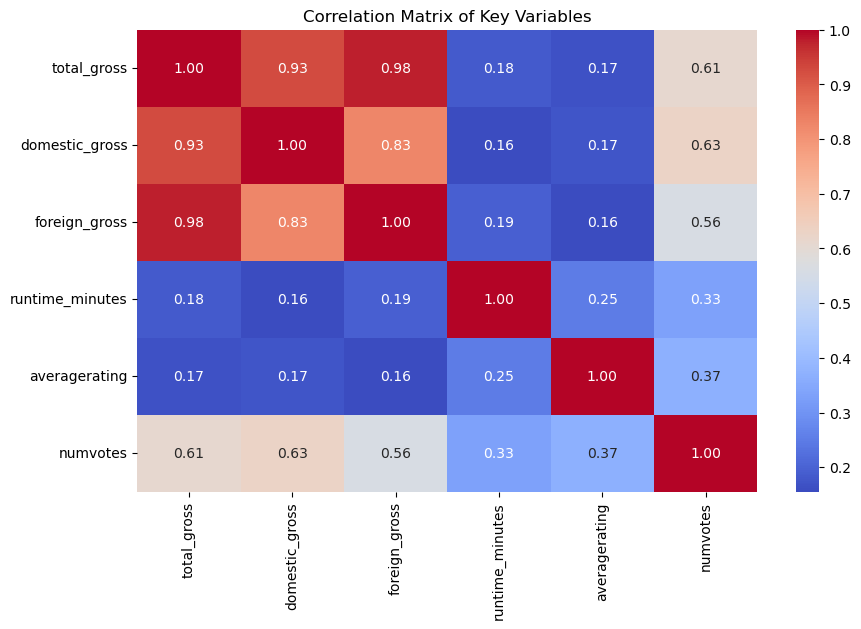

In [60]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Key Variables')
plt.show()

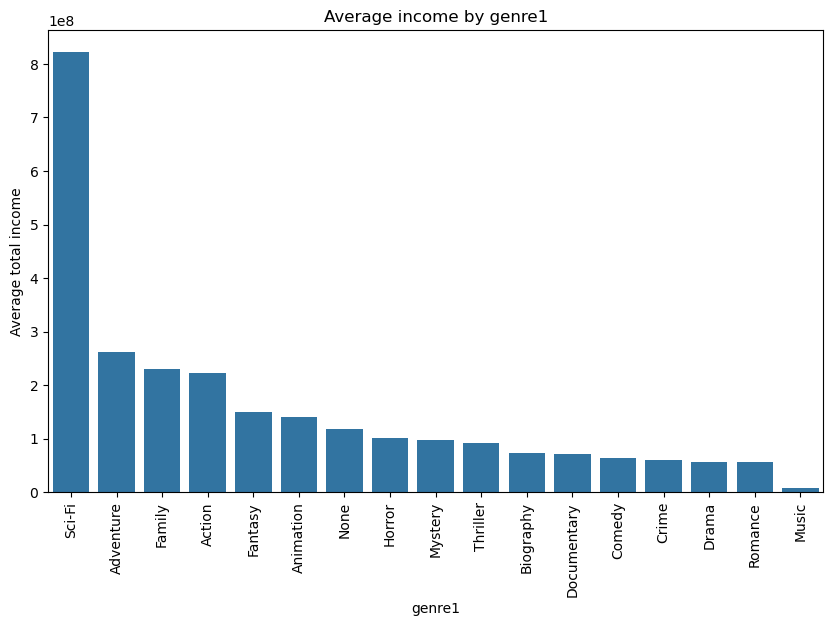

In [64]:
genre_gross = new_df_clean.groupby('genre1')['total_gross'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_gross.index, y=genre_gross.values)
plt.xticks(rotation=90)
plt.title('Average income by genre1')
plt.ylabel('Average total income')
plt.show()

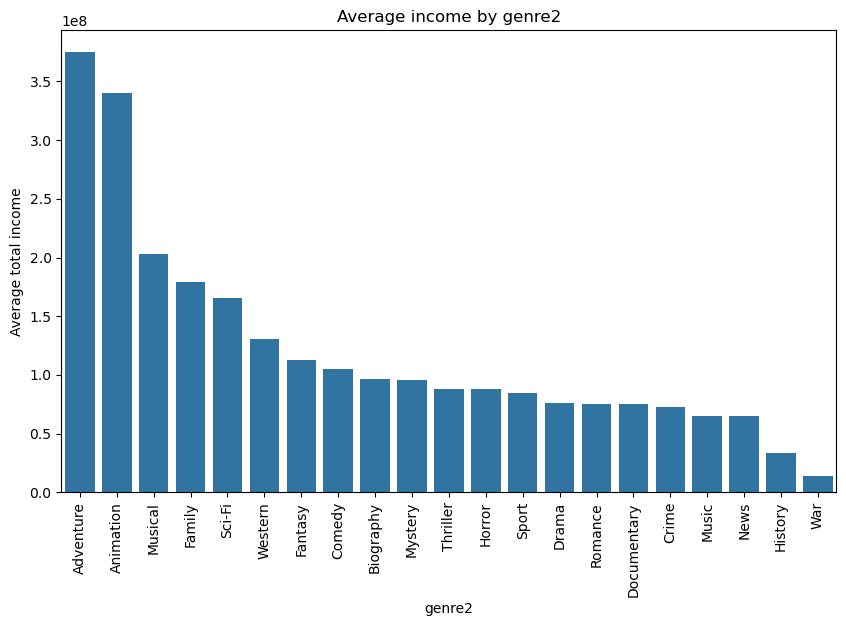

In [65]:
genre_gross = new_df_clean.groupby('genre2')['total_gross'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_gross.index, y=genre_gross.values)
plt.xticks(rotation=90)
plt.title('Average income by genre2')
plt.ylabel('Average total income')
plt.show()

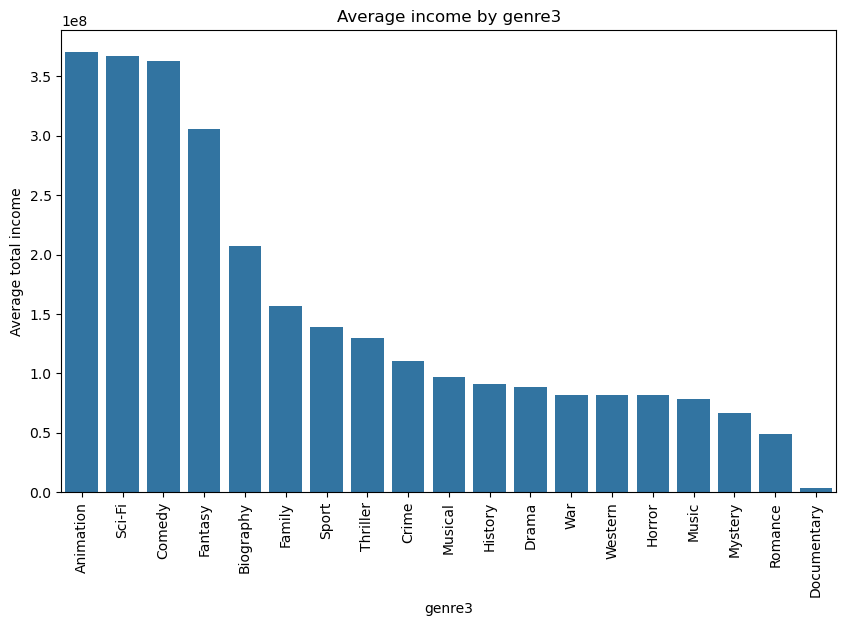

In [66]:
genre_gross = new_df_clean.groupby('genre3')['total_gross'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_gross.index, y=genre_gross.values)
plt.xticks(rotation=90)
plt.title('Average income by genre3')
plt.ylabel('Average total income')
plt.show()

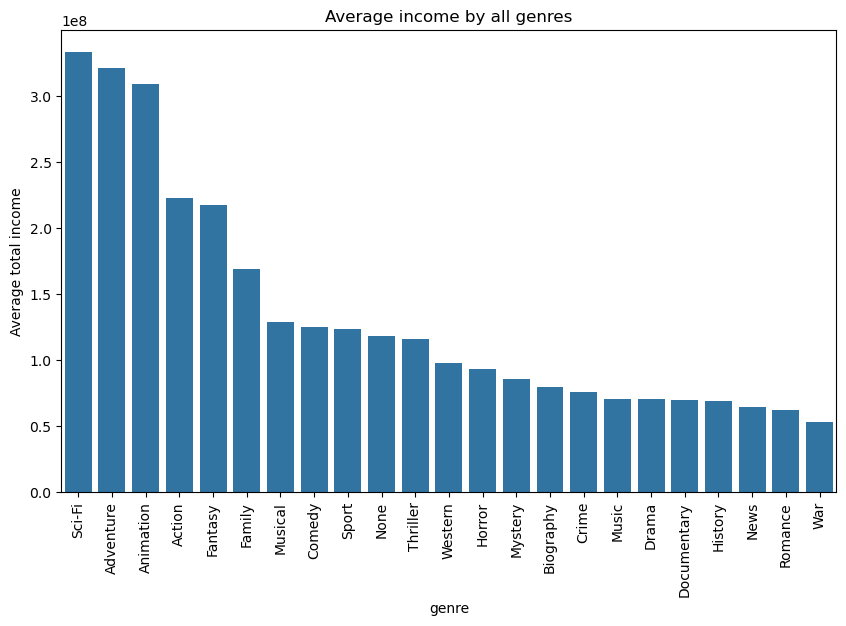

In [67]:
melted_genres = pd.melt(new_df_clean, id_vars=['total_gross'], value_vars=['genre1', 'genre2', 'genre3'], 
                        var_name='genre_type', value_name='genre')

melted_genres = melted_genres.dropna(subset=['genre'])

genre_gross = melted_genres.groupby('genre')['total_gross'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=genre_gross.index, y=genre_gross.values)
plt.xticks(rotation=90)
plt.title('Average income by all genres')
plt.ylabel('Average total income')
plt.show()

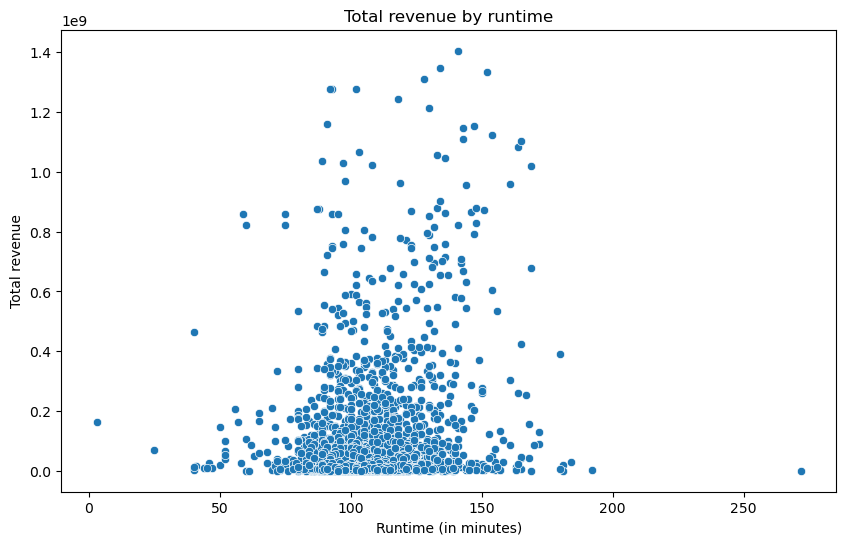

In [68]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='runtime_minutes', y='total_gross', data=new_df_clean)
plt.title('Total revenue by runtime')
plt.xlabel('Runtime (in minutes)')
plt.ylabel('Total revenue')
plt.show()

/var/folders/44/_5xrjzf91674czc29jsl_xs00000gn/T/ipykernel_43660/3273301663.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Type', y='Average Percentage', data=average_distribution, palette='viridis')


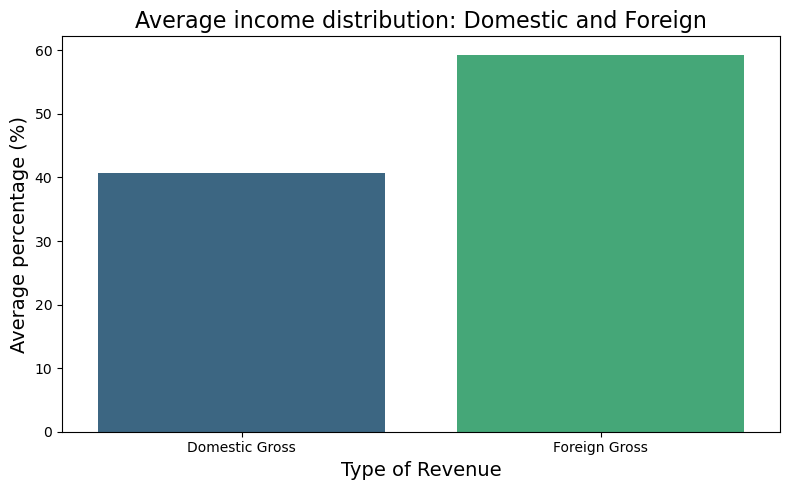

             Type  Average Percentage
0  Domestic Gross           40.757634
1   Foreign Gross           59.242366


In [69]:
average_percent_domestic = new_df_clean['percent_of_domestic'].mean()
average_percent_foreign = new_df_clean['percent_of_foreign'].mean()

average_distribution = pd.DataFrame({
    'Type': ['Domestic Gross', 'Foreign Gross'],
    'Average Percentage': [average_percent_domestic, average_percent_foreign]
})

plt.figure(figsize=(8, 5))
sns.barplot(x='Type', y='Average Percentage', data=average_distribution, palette='viridis')

plt.title('Average income distribution: Domestic and Foreign', fontsize=16)
plt.ylabel('Average percentage (%)', fontsize=14)
plt.xlabel('Type of Revenue', fontsize=14)

plt.tight_layout()
plt.show()

print(average_distribution)

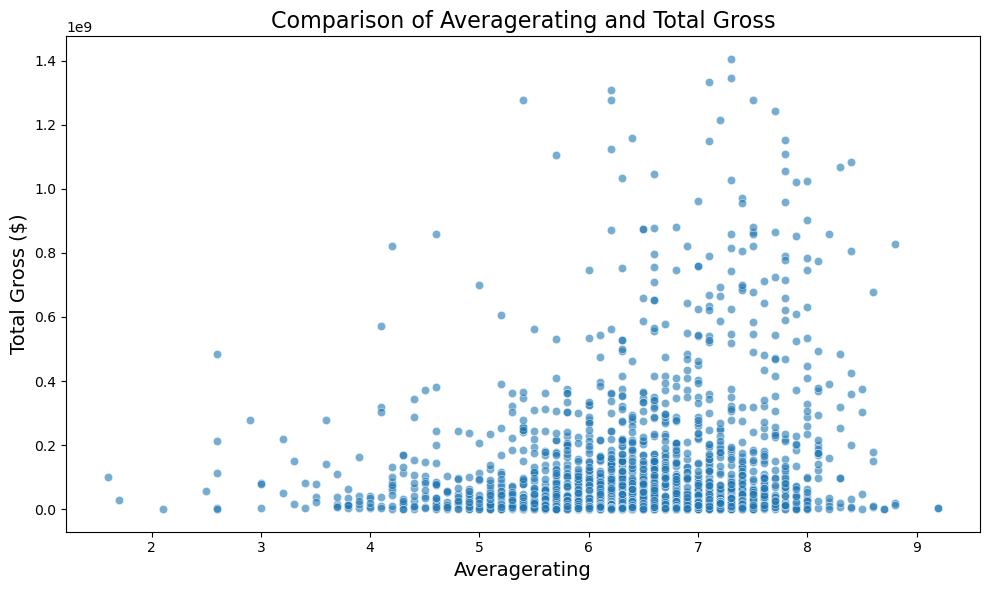

Correlation between averagerating and total gross : 0.17


In [70]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='averagerating', y='total_gross', data=new_df_clean, alpha=0.6)

plt.title('Comparison of Averagerating and Total Gross', fontsize=16)
plt.xlabel('Averagerating', fontsize=14)
plt.ylabel('Total Gross ($)', fontsize=14)

plt.tight_layout()
plt.show()

correlation = new_df_clean['averagerating'].corr(new_df_clean['total_gross'])
print(f'Correlation between averagerating and total gross : {correlation:.2f}')

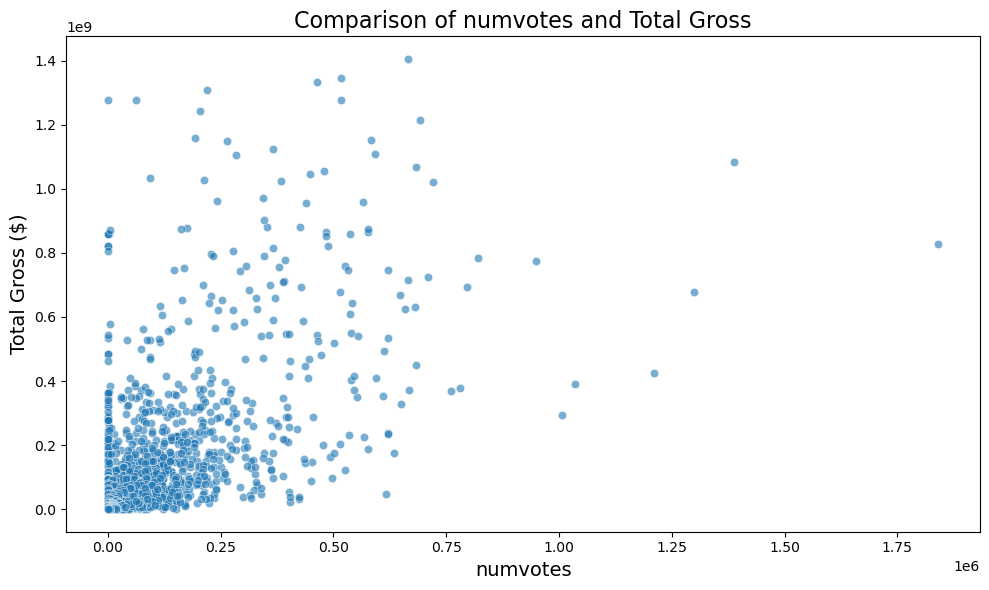

Correlation between numvotes and total gross : 0.61


In [71]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='numvotes', y='total_gross', data=new_df_clean, alpha=0.6)

plt.title('Comparison of numvotes and Total Gross', fontsize=16)
plt.xlabel('numvotes', fontsize=14)
plt.ylabel('Total Gross ($)', fontsize=14)

plt.tight_layout()
plt.show()

correlation = new_df_clean['numvotes'].corr(new_df_clean['total_gross'])
print(f'Correlation between numvotes and total gross : {correlation:.2f}')

## 6- Business Recommendations

### Recommendation 1

/var/folders/44/_5xrjzf91674czc29jsl_xs00000gn/T/ipykernel_43660/256993577.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_performance, x='genre', y='total_gross', palette='viridis')


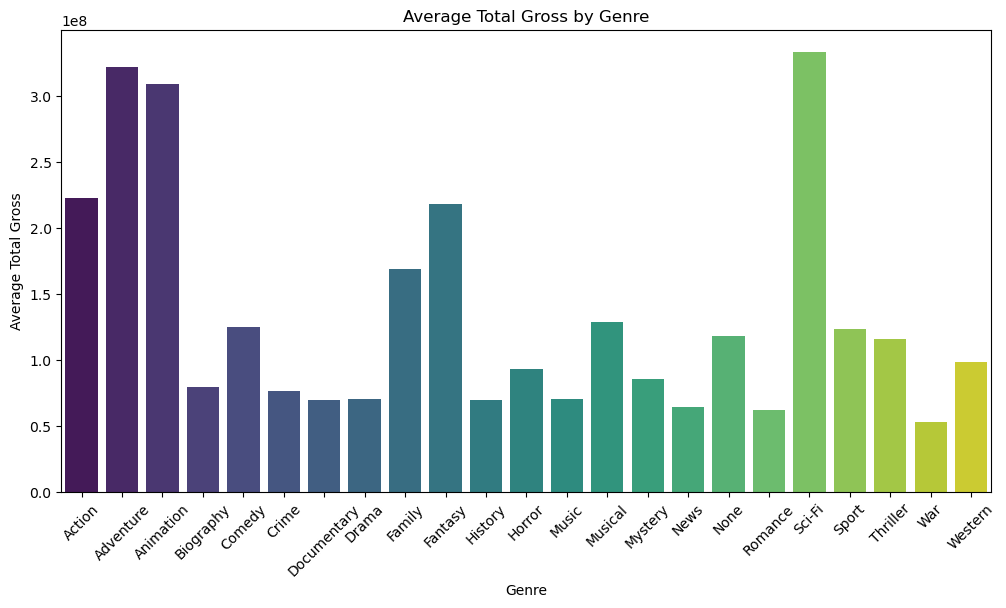

In [55]:
melted_genres = pd.melt(new_df_clean, id_vars=['total_gross'], value_vars=['genre1', 'genre2', 'genre3'], var_name='genre_type', value_name='genre')

genre_performance = melted_genres.groupby('genre')['total_gross'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=genre_performance, x='genre', y='total_gross', palette='viridis')
plt.title('Average Total Gross by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Total Gross')
plt.xticks(rotation=45)
plt.show()

### Recommendation 2

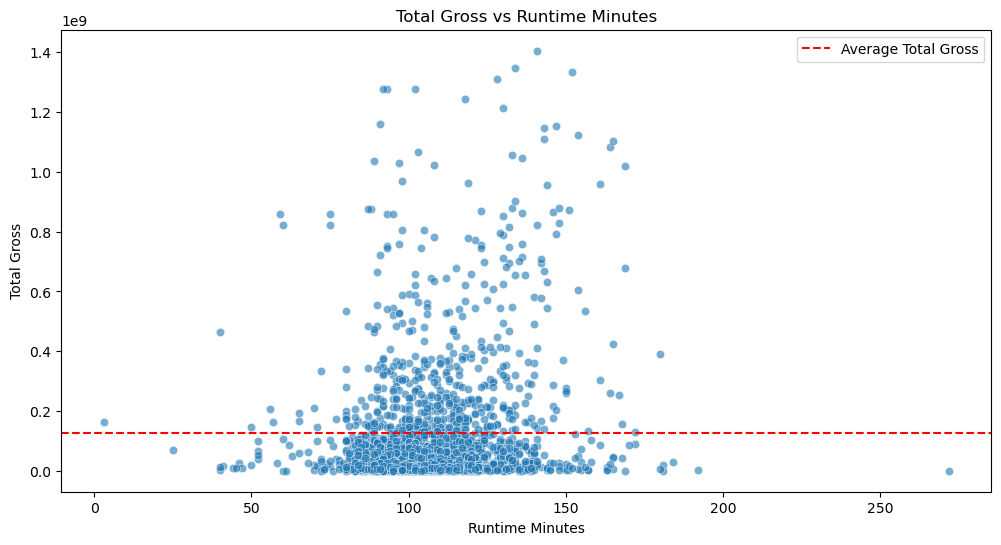

In [56]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=new_df_clean, x='runtime_minutes', y='total_gross', alpha=0.6)
plt.title('Total Gross vs Runtime Minutes')
plt.xlabel('Runtime Minutes')
plt.ylabel('Total Gross')
plt.axhline(y=new_df_clean['total_gross'].mean(), color='r', linestyle='--', label='Average Total Gross')
plt.legend()
plt.show()

In [62]:
import numpy as np
import scipy.stats as stats

threshold = 0.75

cutoff = new_df_clean['total_gross'].quantile(threshold)

top_films = new_df_clean[new_df_clean['total_gross'] >= cutoff]

mean_runtime = top_films['runtime_minutes'].mean()
std_runtime = top_films['runtime_minutes'].std()

n = top_films.shape[0]

standard_error = std_runtime / np.sqrt(n)

confidence_level = 0.95
degrees_freedom = n - 1
confidence_interval = stats.t.interval(confidence_level, degrees_freedom, mean_runtime, standard_error)

confidence_interval

(110.63766989543936, 114.49698794120522)

### Recommendation 3

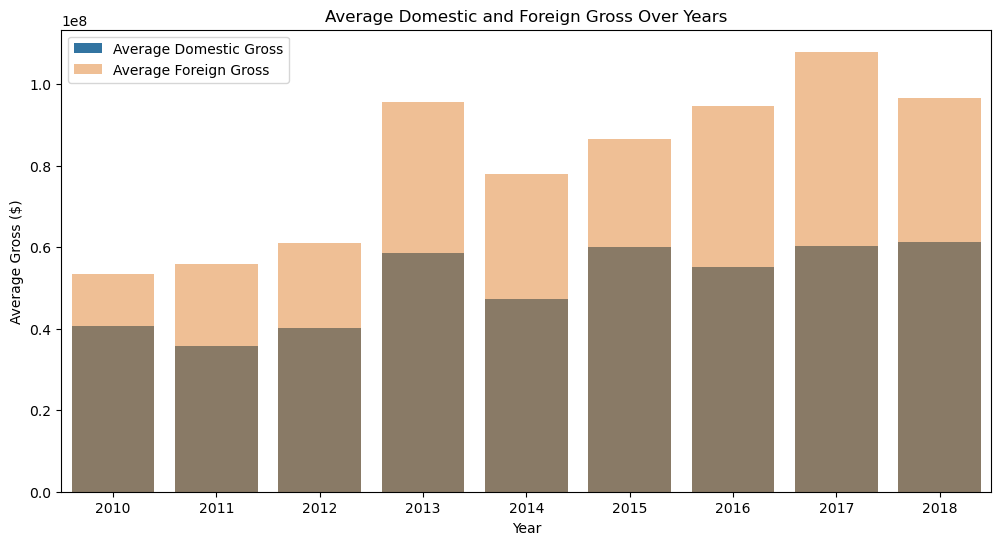

In [59]:
genre_comparison = melted_genres.groupby('genre').agg({'total_gross': ['mean']}).reset_index()
genre_comparison.columns = ['genre', 'average_total_gross']

average_gross = new_df_clean.groupby('year')[['domestic_gross', 'foreign_gross']].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=average_gross, x='year', y='domestic_gross', label='Average Domestic Gross')
sns.barplot(data=average_gross, x='year', y='foreign_gross', label='Average Foreign Gross', alpha=0.5)
plt.title('Average Domestic and Foreign Gross Over Years')
plt.xlabel('Year')
plt.ylabel('Average Gross ($)')
plt.legend()
plt.show()